In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

time_delta = 0.05
LEVELS = {
    'ltl4': 'slip distribution calculators',
    'ltl6': 'slip rate calculators',
}
LABELS = {
    'ltl3': {'WC1994_m2a': 'WC1994a', 'WC1994_m2l': 'WC1994l', 'ThingbaijamEA2017_m2a_n': 'Tea2017a', 'ThingbaijamEA2017_m2l_n': 'Tea2017l'},
    'ltl6': {'LA2004': 'LiuArchuleta2004', 'Lea2006': 'LiuEtAl2006'},
    'ltl7': {'Constant': 'Constant', 'Layered': 'Weak zones', 'RF': 'Random field'},
}

In [3]:
data = pd.read_pickle(os.path.join('workspaces', 'frd', 'cfrd.ff'))
print(len(data))

155


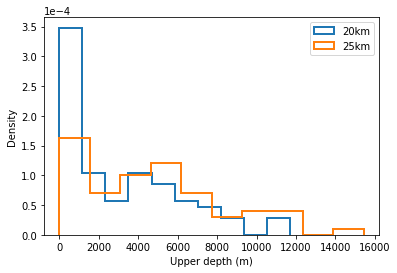

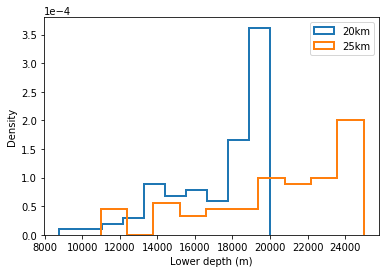

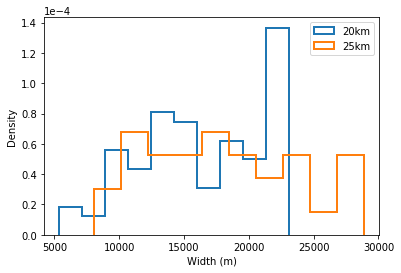

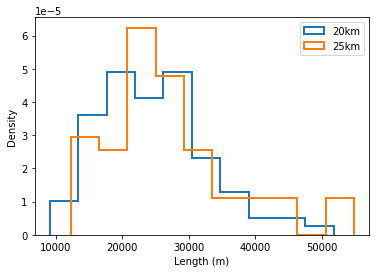

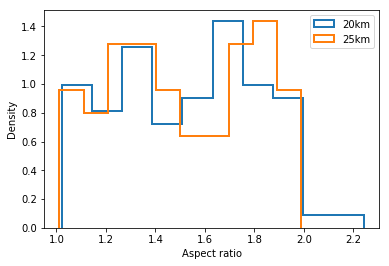

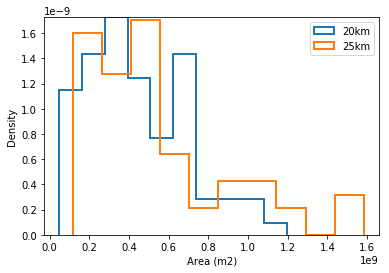

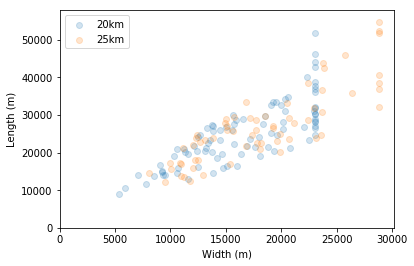

In [4]:
## Geometry

## 20000 lower depth have lower max area than 25000 lower depth because length of fault is reached
##     will give higher average and maximum slips + more likely to rupture surface
## WC1994_m2a gives much lower dimensions
##     will give higher average and maximum slips

level = 'ltl2'
grouped = data.groupby(level) ## Only affected by 2 and 3


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['ud'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Upper depth (m)')
plt.ylabel('Density')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['ld'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Lower depth (m)')
plt.ylabel('Density')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['w'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Width (m)')
plt.ylabel('Density')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['l'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Length (m)')
plt.ylabel('Density')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['l'] / group['w'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Aspect ratio')
plt.ylabel('Density')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['a'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Area (m2)')
plt.ylabel('Density')
title = 'Area distribution'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.scatter(group['w'], group['l'], alpha=0.2, label=name)
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
title = 'Width vs length'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

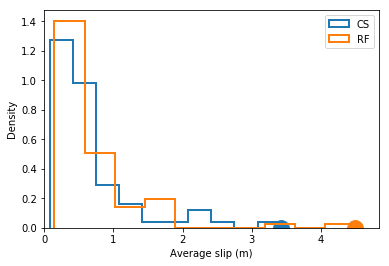

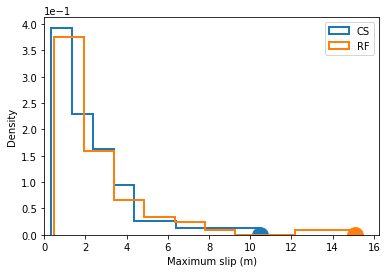

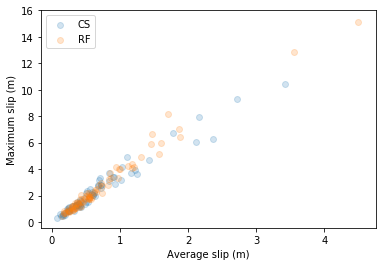

In [5]:
## Average and maximum slip
## Only affected by 2, 3 and 4
## Big difference for 3, little for 4
## max slip controlled by avg slip


level = 'ltl4'
grouped = data.groupby(level)


for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['sd_avg'], histtype='step', density=True, lw=2, label=name)
    plt.scatter(group['sd_avg'].max(), 0, s=250, c=colors[i])
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Average slip (m)')
plt.ylabel('Density')
title = 'Average slip'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['sd_max'], histtype='step', density=True, lw=2, label=name)
    plt.scatter(group['sd_max'].max(), 0, s=250, c=colors[i])
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Maximum slip (m)')
plt.ylabel('Density')
title = 'Maximum slip'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.scatter(group['sd_avg'], group['sd_max'], alpha=0.2, label=name)
plt.legend()
plt.xlabel('Average slip (m)')
plt.ylabel('Maximum slip (m)')
#plt.savefig('images/' + 'avg vs max' + '_%s.png' % level, bbox_inches='tight')
plt.show()

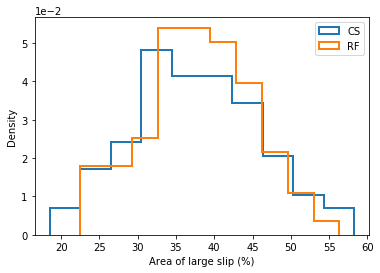

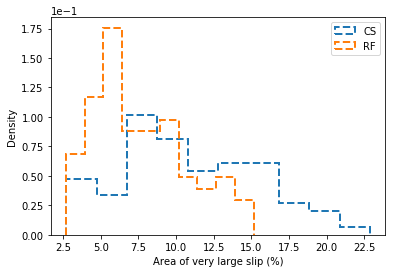

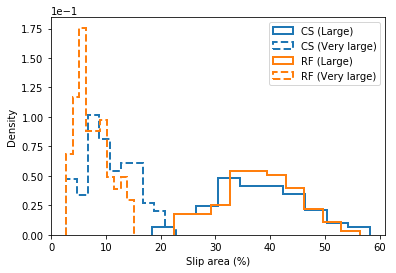

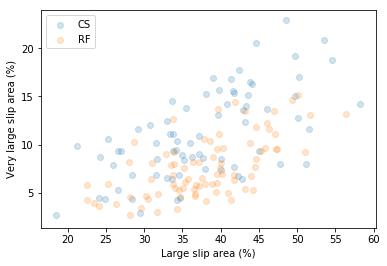

In [6]:
## Asperities
## Only affected by 2, 3 and 4
## Only difference for 4


level = 'ltl4'
grouped = data.groupby(level)

for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['asp_l']*100, histtype='step', density=True, color=colors[i], lw=2, ls='-', label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Area of large slip (%)')
plt.ylabel('Density')
title = 'Large slip area'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['asp_vl']*100, histtype='step', density=True, color=colors[i], lw=2, ls='--', label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Area of very large slip (%)')
plt.ylabel('Density')
title = 'Large (L) and very large (VL) slip area'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['asp_l']*100, histtype='step', density=True, color=colors[i], lw=2, ls='-', label=name + ' (Large)')
    plt.hist(group['asp_vl']*100, histtype='step', density=True, color=colors[i], lw=2, ls='--', label=name + ' (Very large)')
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Slip area (%)')
plt.ylabel('Density')
title = 'Large (L) and very large (VL) slip area'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.scatter(group['asp_l']*100, group['asp_vl']*100, alpha=0.2, label=name)
plt.legend()
plt.xlabel('Large slip area (%)')
plt.ylabel('Very large slip area (%)')
title = 'Large (L) vs very large (VL) slip area'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

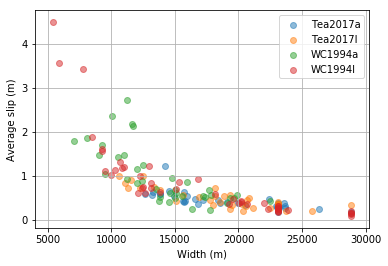

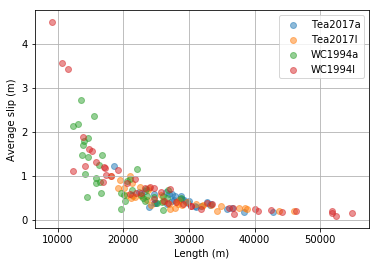

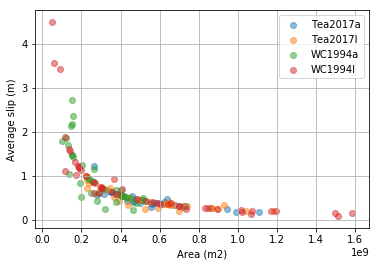

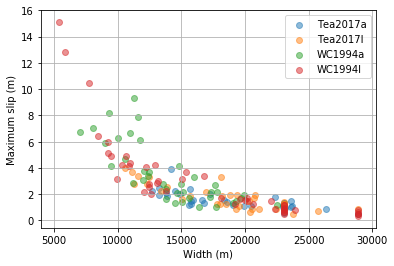

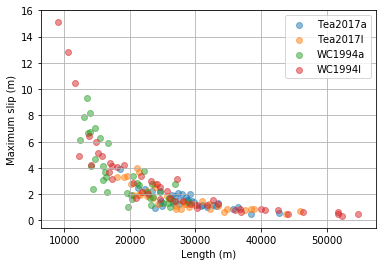

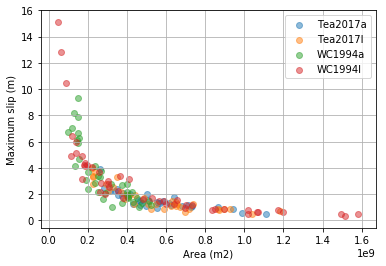

In [7]:
## Slip vs geometry

grouped = data.groupby('ltl3')


for name, group in grouped:
    plt.scatter(group['w'], group['sd_avg'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Width (m)')
plt.ylabel('Average slip (m)')
plt.show()
    
for name, group in grouped:
    plt.scatter(group['l'], group['sd_avg'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Length (m)')
plt.ylabel('Average slip (m)')
plt.show()

for name, group in grouped:
    plt.scatter(group['a'], group['sd_avg'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Area (m2)')
plt.ylabel('Average slip (m)')
plt.show()

for name, group in grouped:
    plt.scatter(group['w'], group['sd_max'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Width (m)')
plt.ylabel('Maximum slip (m)')
plt.show()
    
for name, group in grouped:
    plt.scatter(group['l'], group['sd_max'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Length (m)')
plt.ylabel('Maximum slip (m)')
plt.show()

for name, group in grouped:
    plt.scatter(group['a'], group['sd_max'], alpha=0.5, label=name)
plt.grid()
plt.legend()
plt.xlabel('Area (m2)')
plt.ylabel('Maximum slip (m)')
plt.show()

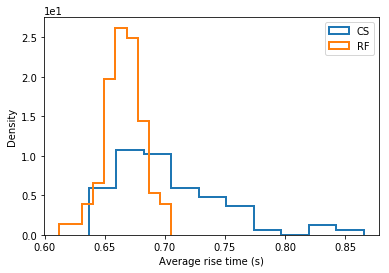

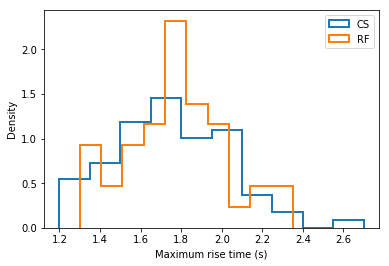

In [8]:
## Rise times
## Only affected by 2, 3 and 4
## Only difference for 4

level = 'ltl4'
grouped = data.groupby(level) 


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['rt_avg'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Average rise time (s)')
plt.ylabel('Density')
title = 'Average rise time (s)'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for name, group in grouped:
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['rt_max'], histtype='step', density=True, lw=2, label=name)
plt.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Maximum rise time (s)')
plt.ylabel('Density')
title = 'Maximum rise time (s)'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

In [ ]:
## Slip rates

level = 'ltl6'
grouped = data.groupby(level)


for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['sr_avg'], histtype='step', density=True, lw=2, label=name)
    plt.scatter(group['sr_avg'].max(), 0, s=250, c=colors[i])
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Average slip rate (m/s)')
plt.ylabel('Density')
title = 'Average slip rate'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()


for i, (name, group) in enumerate(grouped):
    if level in LABELS:
        name = LABELS[level][name]
    plt.hist(group['sr_max'], histtype='step', density=True, lw=2, label=name)
    plt.scatter(group['sr_max'].max(), 0, s=250, c=colors[i])
plt.legend()
plt.xlim(0)
plt.ylim(0)
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xlabel('Maximum slip rate (m/s)')
plt.ylabel('Density')
title = 'Maximum slip rate'
#plt.title(title)
#plt.savefig('images/' + title + '_%s.png' % level, bbox_inches='tight')
plt.show()

In [ ]:
level = 'ltl3'
grouped = data.groupby(level)

for i, (name, group) in enumerate(grouped):
    plt.scatter(group['a'], group['sr_max'])
plt.show()

for i, (name, group) in enumerate(grouped):
    plt.scatter(group['a'], group['rt_max'])
plt.show()